# Hyrax Visualization

For this demonstration we will train a model on an example dataset and then visualize the results.

In [1]:
import pooch
import hyrax

# Train the model

First we download the sample dataset, configure its format and run training.

In [2]:
file_path = pooch.retrieve(
    # DOI for Example HSC dataset
    url="doi:10.5281/zenodo.14498536/hsc_demo_data.zip",
    known_hash="md5:1be05a6b49505054de441a7262a09671",
    fname="example_hsc_new.zip",
    path="../../data",
    processor=pooch.Unzip(extract_dir="."),
)

h = hyrax.Hyrax()
data_dir = "../../data/hsc_8asec_1000"
data_request_definition = {
    "train": {
        "data": {
            "dataset_class": "HSCDataSet",
            "data_location": data_dir,
            "primary_id_field": "object_id",
        },
    },
    "infer": {
        "data": {
            "dataset_class": "HSCDataSet",
            "data_location": data_dir,
            "primary_id_field": "object_id",
        },
    },
}
h.set_config("model.name", "HyraxAutoencoder")
h.set_config("data_request", data_request_definition)
h.config["data_loader"]["batch_size"] = 16
h.config["train"]["epochs"] = 10
h.train()

/Users/derekjones/envs/hyrax/lib/python3.13/site-packages/torch/cuda/__init__.py:65: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


[2026-02-20 12:25:06,673 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.


[2026-02-20 12:25:06,673 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.


[2026-02-20 12:25:06,673 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.lr_scheduler.ExponentialLR.


[2026-02-20 12:25:10,861 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.


[2026-02-20 12:25:10,871 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.


[2026-02-20 12:25:10,871 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.


[2026-02-20 12:25:10,871 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.lr_scheduler.ExponentialLR.


[2026-02-20 12:25:10,872 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.


[2026-02-20 12:25:10,876 hyrax.config_utils:WARNING] Runtime config contains key or section 'data_request' which has no default defined. All configuration keys and sections must be defined in /Users/derekjones/code/work/hyrax/src/hyrax/hyrax_default_config.toml


[2026-02-20 12:25:12,856 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...


[2026-02-20 12:25:12,858 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects


[2026-02-20 12:25:12,873 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning


[2026-02-20 12:25:13,063 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...


[2026-02-20 12:25:13,065 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects


[2026-02-20 12:25:13,075 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning


[2026-02-20 12:25:13,087 hyrax.models.model_registry:INFO] Setting model's self.optimizer from config: torch.optim.SGD with arguments: {'lr': 0.01, 'momentum': 0.9}.


[2026-02-20 12:25:13,088 hyrax.models.model_registry:INFO] Setting model's self.criterion from config: torch.nn.CrossEntropyLoss with default arguments.


[2026-02-20 12:25:13,088 hyrax.models.model_registry:INFO] Setting model's self.scheduler from config: torch.optim.lr_scheduler.ExponentialLR
with arguments: {'gamma': 1}.


[2026-02-20 12:25:13,088 hyrax.verbs.train:INFO] Training model: HyraxAutoencoder


[2026-02-20 12:25:13,088 hyrax.verbs.train:INFO] Training dataset(s):
{'train': Name: data (primary dataset)
  Dataset class: HSCDataSet
  Data location: ../../data/hsc_8asec_1000
  Primary ID field: object_id
  Requested fields: dec, dim, filename, filter, image, mask, object_id, ra, rerun, sh, sw, tract, type, variance
, 'infer': Name: data (primary dataset)
  Dataset class: HSCDataSet
  Data location: ../../data/hsc_8asec_1000
  Primary ID field: object_id
  Requested fields: dec, dim, filename, filter, image, mask, object_id, ra, rerun, sh, sw, tract, type, variance
}


2026-02-20 12:25:13,105 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset 'Name: data (primary': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x1336330e0>, 'batch_size': 16, 'shuffle': False, 'collate_fn': <bound method DataProvider.collate of Name: data (primary dataset)
  Dataset class: HSCDataSet
  Data location: ../../data/hsc_8asec_1000
  Primary ID field: object_id
  Requested fields: dec, dim, filename, filter, image, mask, object_id, ra, rerun, sh, sw, tract, type, variance
>, 'pin_memory': False}


2026-02-20 12:25:13,105 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset 'Name: data (primary': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x133828690>, 'batch_size': 16, 'shuffle': False, 'collate_fn': <bound method DataProvider.collate of Name: data (primary dataset)
  Dataset class: HSCDataSet
  Data location: ../../data/hsc_8asec_1000
  Primary ID field: object_id
  Requested fields: dec, dim, filename, filter, image, mask, object_id, ra, rerun, sh, sw, tract, type, variance
>, 'pin_memory': False}


/Users/derekjones/envs/hyrax/lib/python3.13/site-packages/mlflow/tracking/_tracking_service/utils.py:178: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance. For migrating existing data, https://github.com/mlflow/mlflow-export-import can be used.
  return FileStore(store_uri, store_uri)
2026/02/20 12:25:13 INFO mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics. Set logger level to DEBUG for more details.


2026/02/20 12:25:13 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.


  3%|2         | 1/38 [00:00<?, ?it/s]

  3%|2         | 1/38 [00:00<?, ?it/s]

  3%|2         | 1/38 [00:00<?, ?it/s]

  3%|2         | 1/38 [00:00<?, ?it/s]

  3%|2         | 1/38 [00:00<?, ?it/s]

  3%|2         | 1/38 [00:00<?, ?it/s]

  3%|2         | 1/38 [00:00<?, ?it/s]

  3%|2         | 1/38 [00:00<?, ?it/s]

  3%|2         | 1/38 [00:00<?, ?it/s]

  3%|2         | 1/38 [00:00<?, ?it/s]

[2026-02-20 12:25:25,862 hyrax.pytorch_ignite:INFO] Total training time: 12.64[s]


2026/02/20 12:25:25 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...


2026/02/20 12:25:25 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


[2026-02-20 12:25:25,885 hyrax.verbs.train:INFO] Finished Training


HyraxAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): GELU(approximate='none')
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): GELU(approximate='none')
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): GELU(approximate='none')
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): GELU(approximate='none')
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): GELU(approximate='none')
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=9216, out_features=64, bias=True)
  )
  (dec_linear): Sequential(
    (0): Linear(in_features=64, out_features=9216, bias=True)
    (1): GELU(approximate='none')
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): GELU(approximate='none')
    (2): 

# Inference

We then run inference and umap the resulting latent space.

In [3]:
h.infer()

[2026-02-20 12:25:25,930 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...


[2026-02-20 12:25:25,931 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects


[2026-02-20 12:25:25,942 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning


[2026-02-20 12:25:25,978 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...


[2026-02-20 12:25:25,979 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects


[2026-02-20 12:25:25,989 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning


[2026-02-20 12:25:26,025 hyrax.models.model_registry:INFO] Setting model's self.optimizer from config: torch.optim.SGD with arguments: {'lr': 0.01, 'momentum': 0.9}.


[2026-02-20 12:25:26,025 hyrax.models.model_registry:INFO] Setting model's self.criterion from config: torch.nn.CrossEntropyLoss with default arguments.


[2026-02-20 12:25:26,026 hyrax.models.model_registry:INFO] Setting model's self.scheduler from config: torch.optim.lr_scheduler.ExponentialLR
with arguments: {'gamma': 1}.


[2026-02-20 12:25:26,026 hyrax.verbs.infer:INFO] Inference model: HyraxAutoencoder


[2026-02-20 12:25:26,026 hyrax.verbs.infer:INFO] Inference dataset(s):
{'train': Name: data (primary dataset)
  Dataset class: HSCDataSet
  Data location: ../../data/hsc_8asec_1000
  Primary ID field: object_id
  Requested fields: dec, dim, filename, filter, image, mask, object_id, ra, rerun, sh, sw, tract, type, variance
, 'infer': Name: data (primary dataset)
  Dataset class: HSCDataSet
  Data location: ../../data/hsc_8asec_1000
  Primary ID field: object_id
  Requested fields: dec, dim, filename, filter, image, mask, object_id, ra, rerun, sh, sw, tract, type, variance
}


2026-02-20 12:25:26,026 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset 'Name: data (primary': 
	{'sampler': None, 'batch_size': 16, 'shuffle': False, 'collate_fn': <bound method DataProvider.collate of Name: data (primary dataset)
  Dataset class: HSCDataSet
  Data location: ../../data/hsc_8asec_1000
  Primary ID field: object_id
  Requested fields: dec, dim, filename, filter, image, mask, object_id, ra, rerun, sh, sw, tract, type, variance
>, 'pin_memory': False}


[2026-02-20 12:25:26,040 hyrax.models.model_utils:INFO] Updated config['infer']['model_weights_file'] to: /Users/derekjones/code/work/hyrax/docs/pre_executed/results/20260220-122512-train-LGR7/example_model.pth


[2026-02-20 12:25:26,042 hyrax.verbs.infer:INFO] Saving inference results at: /Users/derekjones/code/work/hyrax/docs/pre_executed/results/20260220-122525-infer-uQYi


[2026-02-20T20:25:26Z WARN  lance::dataset::write::insert] No existing dataset at /Users/derekjones/code/work/hyrax/docs/pre_executed/results/20260220-122525-infer-uQYi/lance_db/results.lance, it will be created


  2%|1         | 1/63 [00:00<?, ?it/s]

[2026-02-20 12:25:29,633 hyrax.pytorch_ignite:INFO] Total evaluation time: 3.58[s]


[2026-02-20 12:25:29,634 hyrax.data_sets.result_dataset:INFO] Optimizing Lance table after 63 batches


[2026-02-20 12:25:29,647 hyrax.data_sets.result_dataset:INFO] Lance table optimization complete


[2026-02-20 12:25:29,647 hyrax.verbs.infer:INFO] Inference Complete.


In [4]:
h.umap()

[2026-02-20 12:25:29,674 hyrax.verbs.umap:INFO] Saving UMAP results to /Users/derekjones/code/work/hyrax/docs/pre_executed/results/20260220-122529-umap-oMbC


[2026-02-20 12:25:29,691 hyrax.verbs.umap:INFO] Fitting the UMAP


[2026-02-20 12:25:34,030 hyrax.verbs.umap:INFO] Saving fitted UMAP Reducer


Creating lower dimensional representation using UMAP::   0%|          | 0/63 [00:00<?, ?it/s]

[2026-02-20T20:25:35Z WARN  lance::dataset::write::insert] No existing dataset at /Users/derekjones/code/work/hyrax/docs/pre_executed/results/20260220-122529-umap-oMbC/lance_db/results.lance, it will be created


[2026-02-20 12:25:37,272 hyrax.data_sets.result_dataset:INFO] Optimizing Lance table after 63 batches


[2026-02-20 12:25:37,283 hyrax.data_sets.result_dataset:INFO] Lance table optimization complete


[2026-02-20 12:25:37,284 hyrax.verbs.umap:INFO] Finished transforming all data through UMAP


# Visualize

Run the visualize command to see the umapped version of the latent space. The lasso, box select, and tap tools in the bokeh interface below will populate the table view once the visualization has rendered.

**NOTE** that the fields must be suffixed with the name of the data provider (`"data"` in this case); this convention helps disambiguate multiple data providers.

[2026-02-20 12:25:38,183 hyrax.verbs.visualize:INFO] UMAP directory not specified at runtime. Reading from config values.


[2026-02-20 12:25:38,419 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...


[2026-02-20 12:25:38,420 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects


[2026-02-20 12:25:38,431 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning


[2026-02-20 12:25:38,467 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...


[2026-02-20 12:25:38,469 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects


[2026-02-20 12:25:38,479 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
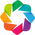

:Layout
   .DynamicMap.I  :DynamicMap   []
      :Points   [x,y]
   .DynamicMap.II :DynamicMap   []
      :Table   [object_id]   (x,y,ra_data,dec_data)

:Layout
   .DynamicMap.I  :DynamicMap   []
      :Points   [x,y]
   .DynamicMap.II :DynamicMap   []
      :Table   [object_id]   (x,y,ra_data,dec_data)

In [5]:
h.config["visualize"]["fields"] = ["ra_data", "dec_data"]
h.visualize(width=800, height=800)